In [160]:
import os
import glob
import codecs
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

filepath -> ./experimental_data/txt/0713-main.TXT


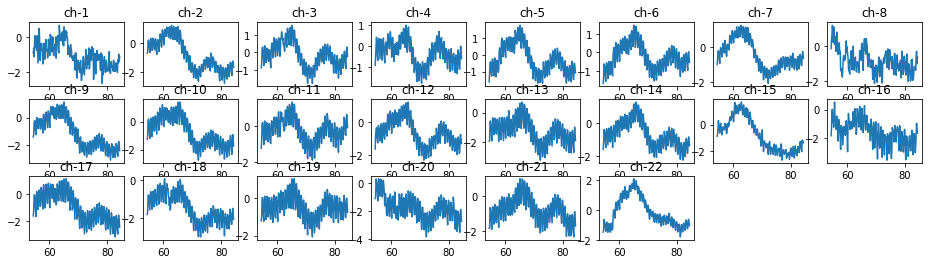

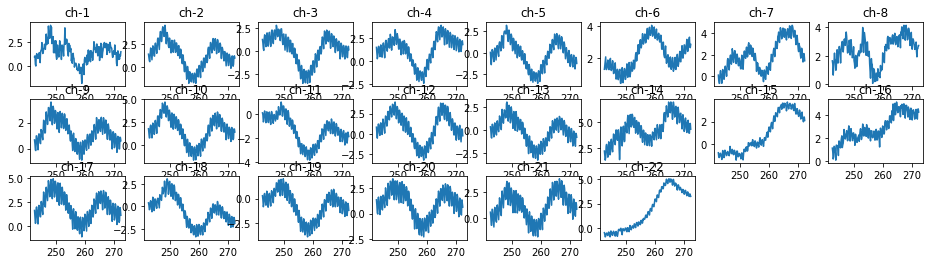

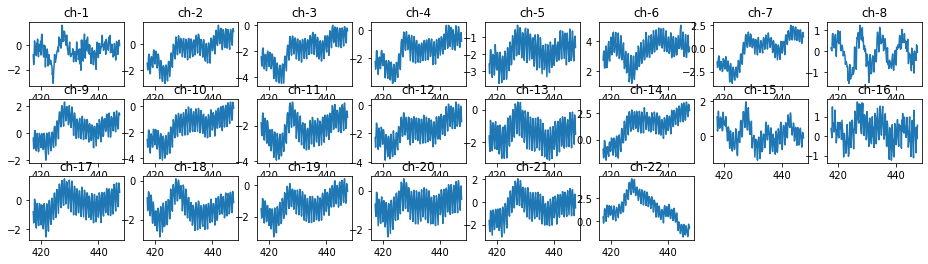

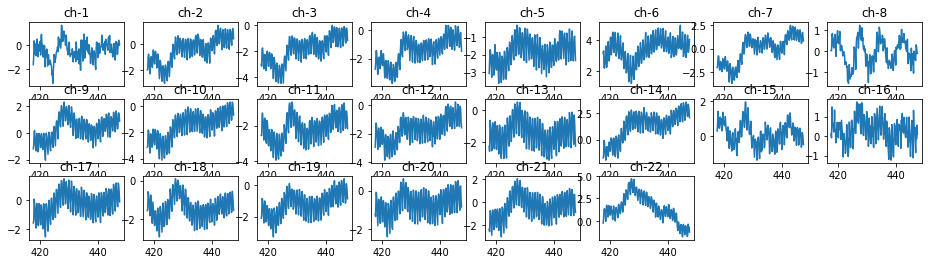

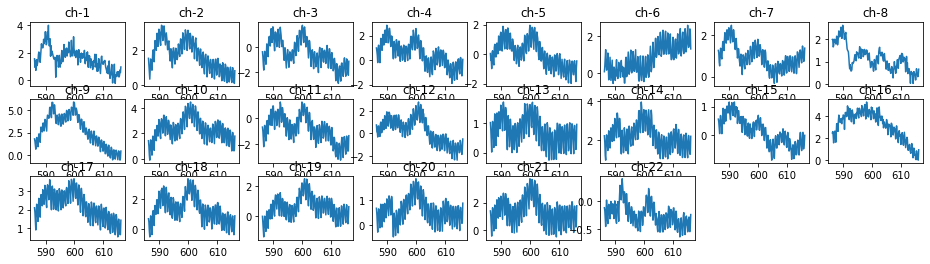

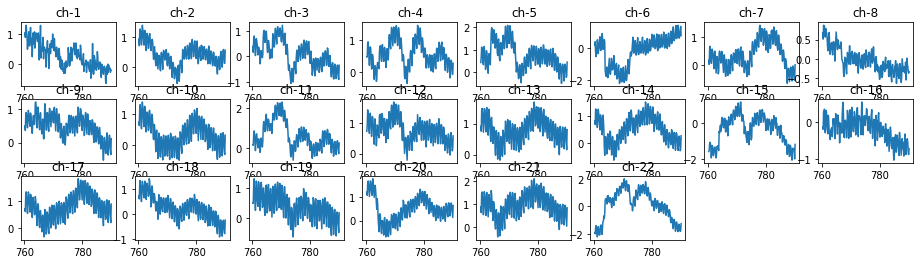

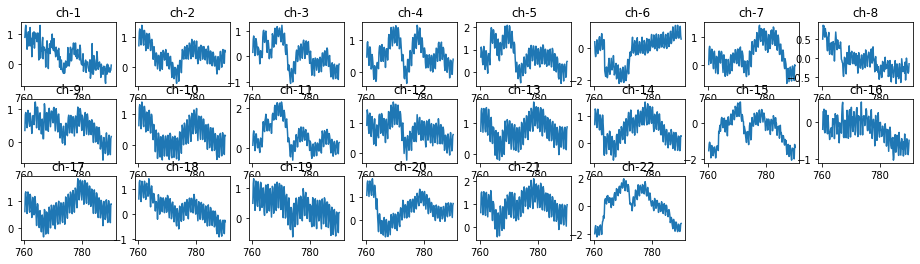

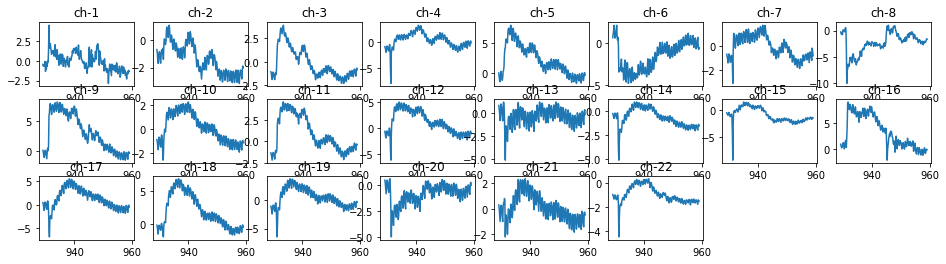

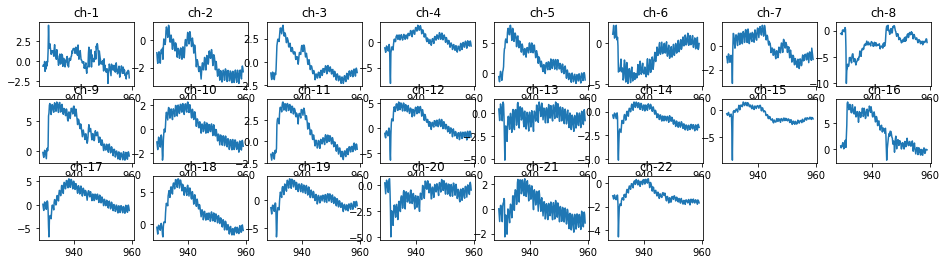

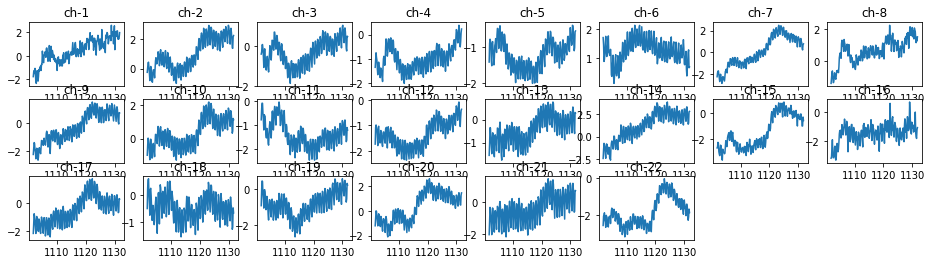

In [172]:
# define constants.
measurement_period = 0.15  # [sec]
preceding_rest_duration = 45  # [sec]
task_duration = 30            # [sec]
following_rest_duration = 45  # [sec]
num_preceding_rest_samples = int(preceding_rest_duration/measurement_period)
num_task_samples = int(task_duration/measurement_period)
num_following_rest_samples = int(following_rest_duration/measurement_period)
num_trial_samples = num_preceding_rest_samples+num_task_samples+num_following_rest_samples
num_columns = 70
data_table_start_row_index = 33
marker_string = "1"
filepath = filepath_list[5]
data_dir = './experimental_data/txt'
filepath_list = glob.glob(data_dir+'/*')
print('filepath -> {}'.format(filepath))

names = np.arange(num_columns).astype(str)
df = pd.read_csv(filepath, names=names, sep='\t')
# display(df)

oxy_data = df[[*names[:3:2],*names[4::3]]][data_table_start_row_index:].values
oxy_df_column_labels = [*oxy_data[1][:2], *[label.replace(' ', '') for label in oxy_data[0][2:]]]
# print('oxy_df_column_labels -> {}'.format(oxy_df_column_labels))
oxy_df = pd.DataFrame(oxy_data[2:], columns=oxy_df_column_labels)
# display(oxy_df)

finding_marker_query_statement = 'Mark=="{}"'.format(marker_string)
marker_index_array = oxy_df.query(finding_marker_query_statement).index.values
num_markers = marker_index_array.shape[0]
# print('marker_index_array -> {}'.format(marker_index_array))

for i in range(num_markers):
    marker_index = marker_index_array[i]
    following_marker_index = marker_index_array[i+1] if i != num_markers-1 else -1
    channel_labels = oxy_df_column_labels[2:]
    time_label = oxy_df_column_labels[0]
    all_channel_preceding_rest_samples = oxy_df[channel_labels][
        marker_index
        :marker_index+num_preceding_rest_samples
    ]
    all_channel_preceding_rest_sample_averages = np.average(all_channel_preceding_rest_samples.values.astype(float), axis=0)
    
    all_channel_preceding_rest_sample_stds = np.std(all_channel_preceding_rest_samples.values.astype(float), axis=0)
    preceding_rest_times = oxy_df[time_label][
        marker_index
        :marker_index+num_preceding_rest_samples
    ].values.astype(float)
    all_channel_task_samples = oxy_df[channel_labels][
        marker_index+num_preceding_rest_samples
        :marker_index+num_preceding_rest_samples+num_task_samples
    ]
    task_times = oxy_df[time_label][
        marker_index+num_preceding_rest_samples
        :marker_index+num_preceding_rest_samples+num_task_samples
    ].values.astype(float)
    z_normalized_all_channel_task_samples = ((all_channel_task_samples.values.astype(float) - all_channel_preceding_rest_sample_averages) / all_channel_preceding_rest_sample_stds).T
    plt.figure(figsize=(16,4))
    for i, channel_label in enumerate(channel_labels):
        task_samples = z_normalized_all_channel_task_samples[i]
#          task_samples = all_channel_task_samples[channel_label].values.astype(float)
        plt.subplot(3,8,i+1)
        plt.title(channel_label)
        plt.plot(task_times, task_samples)
    plt.show()